# **Modelo de Aprendizaje Automático Supervisado: Regresión**


Evaluación del modelo en el conjunto de Validación:
  - Mean Squared Error (MSE) en validación: 19.15
  - Mean Absolute Error (MAE) en validación: 3.51
  - R² Score en validación: 0.66

Evaluación final del modelo en el conjunto de Prueba:
  - Mean Squared Error (MSE) en prueba: 18.00
  - Mean Absolute Error (MAE) en prueba: 3.58
  - R² Score en prueba: 0.64


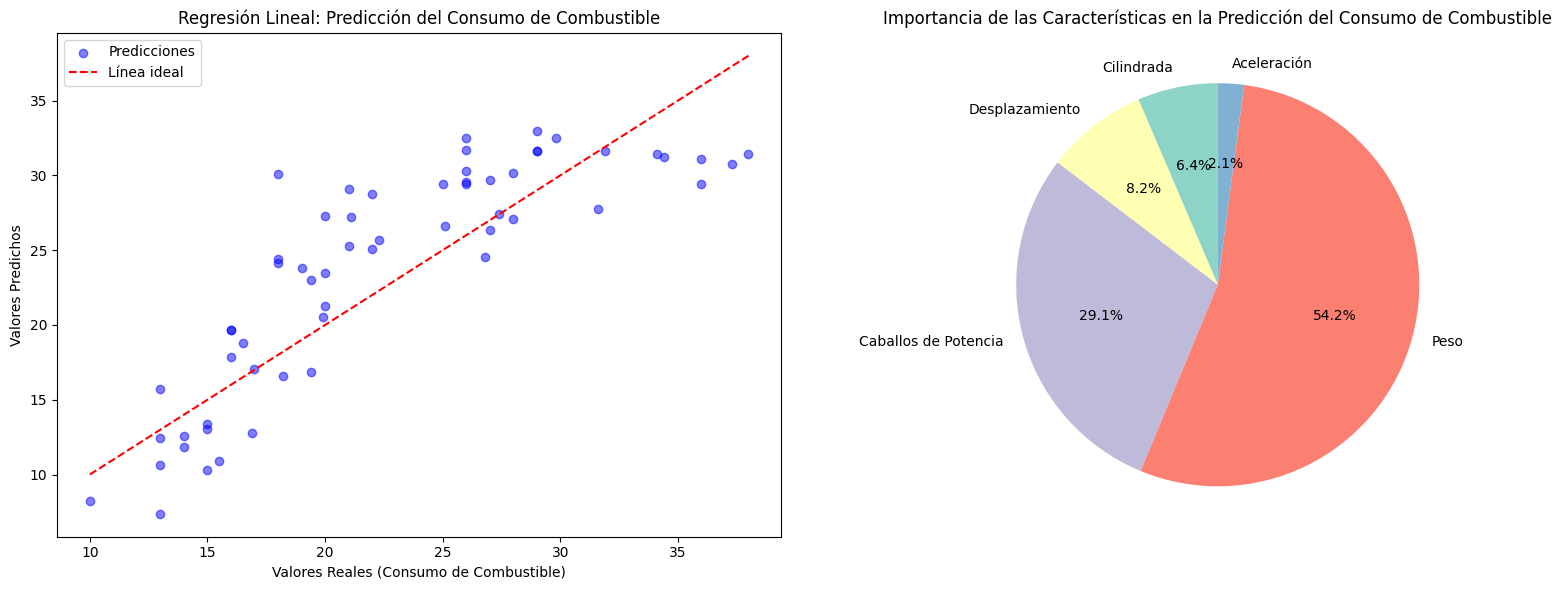

In [ ]:
#------------------------------------------------------------------------
# 1.  Instalación de las bibliotecas necesarias
#------------------------------------------------------------------------
import numpy                  as np
import pandas                 as pd
import matplotlib.pyplot      as plt
import seaborn                as sns
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import StandardScaler
from sklearn.linear_model     import LinearRegression
from sklearn.metrics          import mean_squared_error, mean_absolute_error, r2_score

#------------------------------------------------------------------------
# 2. Preparación de los datos
#------------------------------------------------------------------------
# 2.1. Cargamos el dataset Auto MPG de biblioteca Seaborn
#------------------------------------------------------------------------
DATASET = sns.load_dataset( "mpg" )

#------------------------------------------------------------------------
# 2.2. Eliminamos las filas que contienen valores nulos (NaN) o faltantes
#------------------------------------------------------------------------
df = DATASET.dropna()

#------------------------------------------------------------------------
# 2.3. Seleccionamos solo las columnas de la lista
#------------------------------------------------------------------------
COLUMNAS = [ 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration' ]
df = df[ COLUMNAS ]

#------------------------------------------------------------------------
# 2.4. Renombramos las columnas con nombres en español
#------------------------------------------------------------------------
df.rename( columns = {
    'mpg':          'Consumo de Combustible',
    'cylinders':    'Cilindrada',
    'displacement': 'Desplazamiento',
    'horsepower':   'Caballos de Potencia',
    'weight':       'Peso',
    'acceleration': 'Aceleración'
}, inplace = True )

#------------------------------------------------------------------------
# 2.5. Definimos las variables predictoras (X) y objetivo (y)
#------------------------------------------------------------------------
X = df.drop( columns = [ 'Consumo de Combustible' ] )  # Características
y = df[ 'Consumo de Combustible' ]  # Variable objetivo (consumo de combustible)

#------------------------------------------------------------------------
# 2.6. Dividimos los datos en entrenamiento (70%), prueba (15%) y validación (15%)
#------------------------------------------------------------------------
TEST        = 0.30
VALIDACION  = 0.50  # Parte de los valores de TEST que se destinan a validación
X_train, X_temp, y_train, y_temp = train_test_split( X,      y,      test_size = TEST,       random_state = 42 )  # 70% para entrenamiento, 30% para prueba + validación
X_valid, X_test, y_valid, y_test = train_test_split( X_temp, y_temp, test_size = VALIDACION, random_state = 42 )  # 50% de la parte restante para prueba y validación

#------------------------------------------------------------------------
# 2.7. Normalizamos los datos
#------------------------------------------------------------------------
scaler  = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_valid = scaler.transform(     X_valid )  # Transforma el conjunto de validación
X_test  = scaler.transform(     X_test  )  # Transforma el conjunto de prueba

#------------------------------------------------------------------------
# 3. Creamos el modelo de Regresión Lineal
#------------------------------------------------------------------------
modelo = LinearRegression()

#------------------------------------------------------------------------
# 4. Entrenamiento del modelo con los datos de entrenamiento
#------------------------------------------------------------------------
modelo.fit( X_train, y_train )

#------------------------------------------------------------------------
# 5. Evaluación del modelo con los datos de validación
#------------------------------------------------------------------------
y_valid_pred = modelo.predict( X_valid )
mse_valid    = mean_squared_error(  y_valid, y_valid_pred )
mae_valid    = mean_absolute_error( y_valid, y_valid_pred )
r2_valid     = r2_score( y_valid, y_valid_pred )

print( "\nEvaluación del modelo en el conjunto de Validación:" )
print( f"  - Mean Squared Error (MSE) en validación: {mse_valid:.2f}"  )
print( f"  - Mean Absolute Error (MAE) en validación: {mae_valid:.2f}" )
print( f"  - R² Score en validación: {r2_valid:.2f}" )

#------------------------------------------------------------------------
# 6. Realización de predicciones sobre el conjunto de prueba
#------------------------------------------------------------------------
y_test_pred = modelo.predict( X_test )

#------------------------------------------------------------------------
# 7. Evaluación final en el conjunto de prueba
#------------------------------------------------------------------------
mse_test = mean_squared_error(  y_test, y_test_pred )
mae_test = mean_absolute_error( y_test, y_test_pred )
r2_test  = r2_score(            y_test, y_test_pred )

print( "\nEvaluación final del modelo en el conjunto de Prueba:"  )
print( f"  - Mean Squared Error (MSE) en prueba: {mse_test:.2f}"  )
print( f"  - Mean Absolute Error (MAE) en prueba: {mae_test:.2f}" )
print( f"  - R² Score en prueba: {r2_test:.2f}" )

#------------------------------------------------------------------------
# 7. Generamos las representaciones gráficas
#------------------------------------------------------------------------
# 7.1. Mostramos el gráfico lineal de predicción de consumo
fig, ax = plt.subplots( 1, 2, figsize = ( 16, 6 ) )  # 1 fila, 2 columnas

# Gráfico 1: Predicciones vs Valores Reales (para el conjunto de prueba)
ax[ 0 ].scatter( y_test, y_test_pred, alpha = 0.5, color = "blue", label = "Predicciones" )
ax[ 0 ].plot( [ min( y_test ), max( y_test ) ], [ min( y_test ), max( y_test ) ], color = 'red', linestyle = 'dashed', label = "Línea ideal" )
ax[ 0 ].set_xlabel( "Valores Reales (Consumo de Combustible)" )
ax[ 0 ].set_ylabel( "Valores Predichos" )
ax[ 0 ].set_title(  "Regresión Lineal: Predicción del Consumo de Combustible" )
ax[ 0 ].legend()

#------------------------------------------------------------------------
# 7.2. Mostramos el gráfico circular de áreas
#------------------------------------------------------------------------
# Usamos los valores absolutos de los coeficientes para evitar problemas con valores negativos
coef_abs = np.abs( modelo.coef_ )

# Normalizamos los coeficientes para que sumen 100%
coef_norm = coef_abs / np.sum( coef_abs ) * 100

# Gráfico 2: Gráfico Circular de Áreas
ax[ 1 ].pie( coef_norm, labels = X.columns, autopct = '%1.1f%%', startangle = 90, colors = sns.color_palette( "Set3", len( X.columns ) ) )
ax[ 1 ].set_title( "Importancia de las Características en la Predicción del Consumo de Combustible" )

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado entre subgráficos
plt.show()
